In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [3]:
import pandas as pd

# Merge features and target into a single dataframe
df = pd.concat([X, y], axis=1)

# Display the merged dataframe
print(df.head())


   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


<Axes: xlabel='Class', ylabel='count'>

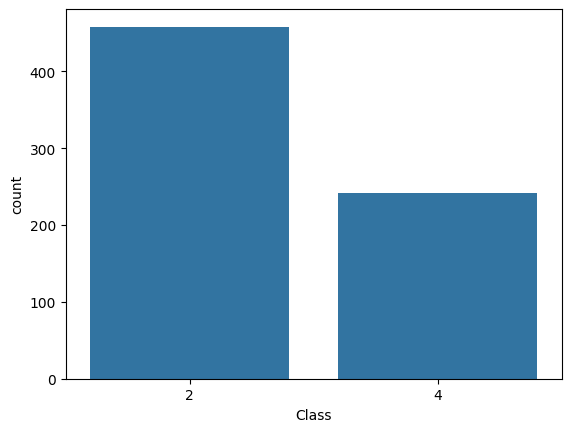

In [5]:
import seaborn as sns
sns.countplot(x='Class', data=df)

<ipython-input-6-33d23b1a7e85>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=colors)


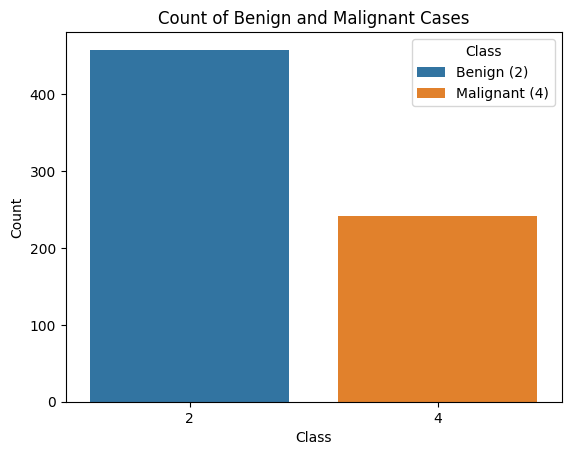

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for benign and malignant classes
colors = ['#1f77b4', '#ff7f0e']  # You can choose any colors you prefer

# Create count plot with specific colors
sns.countplot(x='Class', data=df, palette=colors)

# Add custom legend with colors
plt.legend(['Benign (2)', 'Malignant (4)'], title='Class', loc='upper right')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Benign and Malignant Cases')

plt.show()


#  **Preprocessing**

In [7]:


# Fill missing values in the Bare_nuclei column with the median
df['Bare_nuclei'].fillna(df['Bare_nuclei'].median(), inplace=True)

<ipython-input-7-480e5359d712>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bare_nuclei'].fillna(df['Bare_nuclei'].median(), inplace=True)


In [8]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = df.drop(columns='Class')
y = df['Class']


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  **Initialize models**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [11]:

models = {
    'Logistic Regression': LogisticRegression(C=0.01),  # High regularization, low iterations
    'Decision Tree': DecisionTreeClassifier(max_depth=2, min_samples_split=10),  # Limited depth, high split min
    'Random Forest': RandomForestClassifier(n_estimators=5, max_depth=2),  # Fewer trees, limited depth
    'Support Vector Machine': SVC(kernel='linear', C=0.1),  # Linear kernel with high regularization
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=20)  # High k value for excessive smoothing
}


Logistic Regression Accuracy: 0.97
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



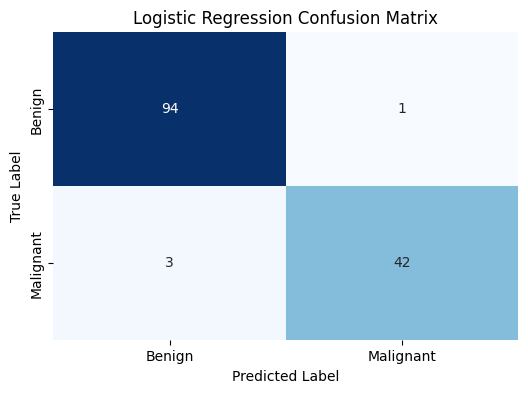

Decision Tree Accuracy: 0.94
Decision Tree Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.95      0.95        95
           4       0.89      0.91      0.90        45

    accuracy                           0.94       140
   macro avg       0.92      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140



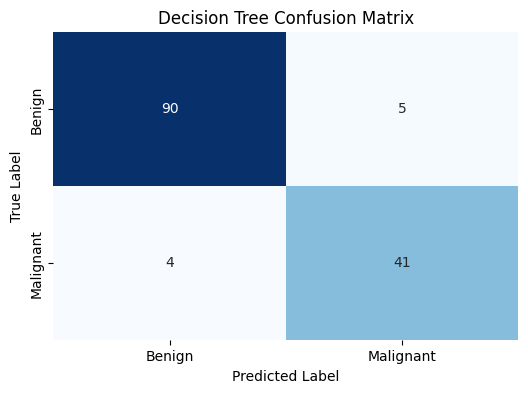

Random Forest Accuracy: 0.97
Random Forest Classification Report:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98        95
           4       0.96      0.96      0.96        45

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



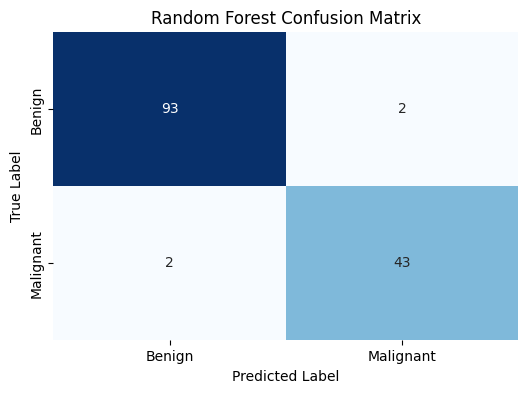

Support Vector Machine Accuracy: 0.96
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.99      0.97        95
           4       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



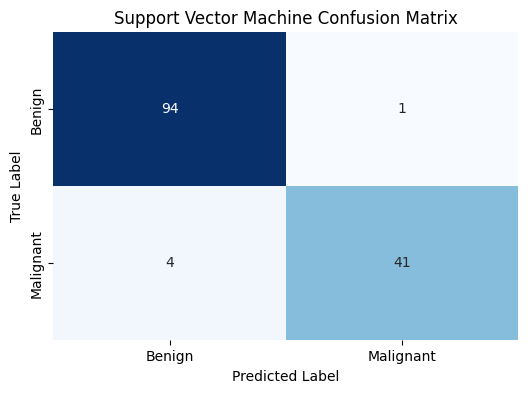

K-Nearest Neighbors Accuracy: 0.97
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



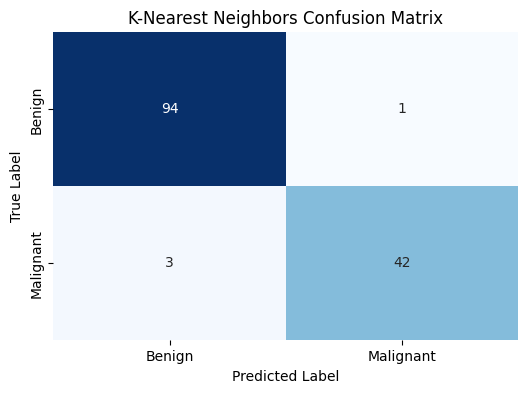

In [12]:



from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Step 3: Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')

    # Classification report
    print(f'{model_name} Classification Report:\n', classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


# **SMOTE**

In [13]:

from imblearn.over_sampling import SMOTE

In [14]:

# Step 3: Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_balanced.value_counts())

Class distribution after SMOTE:
Class
2    458
4    458
Name: count, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

Logistic Regression Accuracy: 0.97
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.98      0.97        93
           4       0.98      0.97      0.97        91

    accuracy                           0.97       184
   macro avg       0.97      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



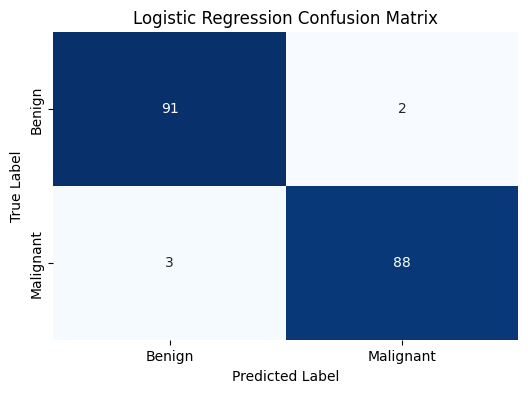

Decision Tree Accuracy: 0.91
Decision Tree Classification Report:
               precision    recall  f1-score   support

           2       0.91      0.91      0.91        93
           4       0.91      0.91      0.91        91

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



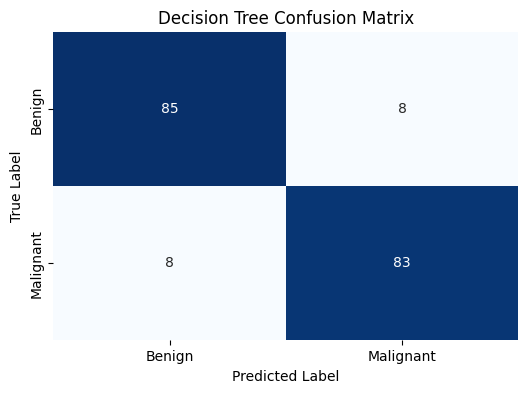

Random Forest Accuracy: 0.95
Random Forest Classification Report:
               precision    recall  f1-score   support

           2       0.98      0.92      0.95        93
           4       0.93      0.98      0.95        91

    accuracy                           0.95       184
   macro avg       0.95      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184



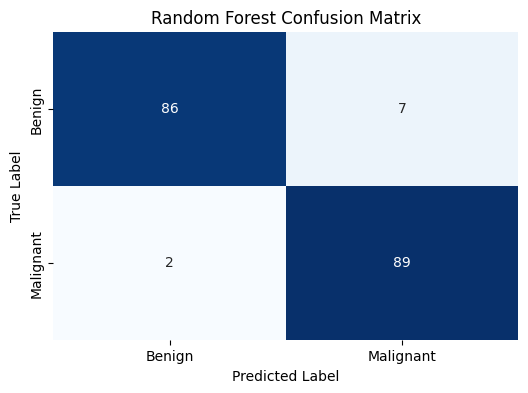

Support Vector Machine Accuracy: 0.98
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           2       0.99      0.97      0.98        93
           4       0.97      0.99      0.98        91

    accuracy                           0.98       184
   macro avg       0.98      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184



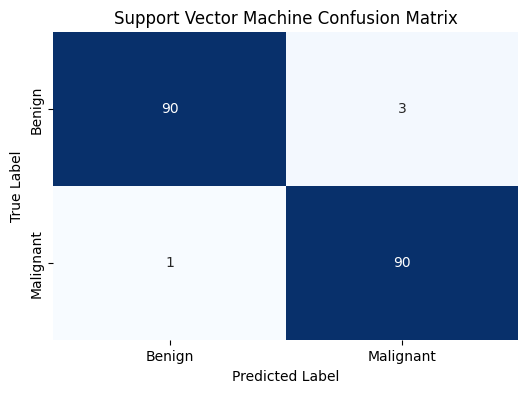

K-Nearest Neighbors Accuracy: 0.98
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           2       0.99      0.98      0.98        93
           4       0.98      0.99      0.98        91

    accuracy                           0.98       184
   macro avg       0.98      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184



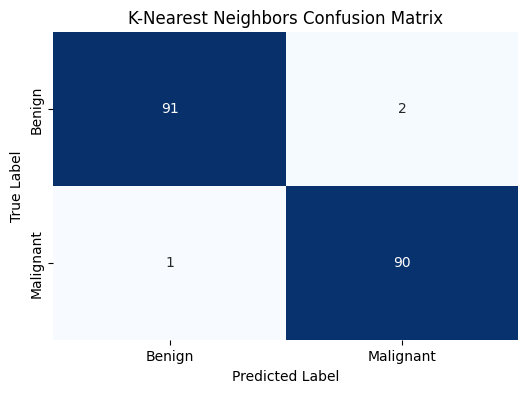

In [16]:

# Step 5: Train, predict, and evaluate each model on balanced data
for model_name, model in models.items():
    # Train the model on balanced data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')

    # Classification report
    print(f'{model_name} Classification Report:\n', classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# **Kfold**

In [17]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(clf, X, y, cv=60)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.06


In [18]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=0.1)
scores = cross_val_score(clf, X, y, cv=60)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.06


In [ ]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=5, max_depth=2)
scores = cross_val_score(clf, X, y, cv=60)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.06


In [ ]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(max_depth=2, min_samples_split=10)
scores = cross_val_score(clf, X, y, cv=60)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.93 accuracy with a standard deviation of 0.08


In [ ]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(C=0.01)
scores = cross_val_score(clf, X, y, cv=60)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.06
